In [2]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')

if len(gpus) > 0:
    tf.config.experimental.set_visible_devices(devices=gpus[0], device_type='GPU')
    tf.config.experimental.set_memory_growth(device=gpus[0], enable=True)

from tensorflow import keras
from tensorflow.keras import layers, backend, losses, Sequential
from tensorflow.keras.utils import Sequence

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

import random
import numpy as np

    
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams["figure.dpi"] = 100.0

In [3]:
def show_random_digits(X):

    scale = np.abs(X).max()

    # Mostrar varios ejemplos.
    fig, axs = plt.subplots(6, 9, sharex=True, figsize=(15, 10))

    for ax in axs.flatten():
        x = random.choice(X)
        ax.imshow(x.reshape(28,28), interpolation='nearest', cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
        

In [4]:
# Primero cargamos el dataset de MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [10]:
def build_model(hidden=True):
    
    m = Sequential()
    
    m.add(keras.Input(shape=(28 * 28, )))
    
    if hidden:
        # Capa escondida
        m.add(tf.keras.layers.Dense(128, activation='relu'))
    
    # Afterwards, we do automatic shape inference:
    m.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    m.compile(optimizer='adam', loss='categorical_crossentropy')
    
    print(m.summary())
    
    return m

In [12]:
# Solo queremos detectar si una imagen representa un tres o no.
y_ = np.zeros((len(y), 10))

for i, _ in enumerate(y):
    y_[i][int(_)] = 1.0

# Partir el set de datos en entrenamiento y pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y_, train_size=10000, test_size=1000)

# Seed para el generador de numeros aleatorios.
random_state = check_random_state(2020)

# Permutar el dataset.
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

# Flatten.
X = X.reshape((X.shape[0], -1))

# Normalize.
scaler = StandardScaler()
X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.transform(X_test)

# Modelo
m = build_model(hidden=True)

# Entrenar.
m.fit(X_train_nor, y_train, epochs=14, validation_data=(X_test_nor, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Train on 10000 samples, validate on 1000 samples
Epoch 1/14
10000/10000 [==============================] - 1s 62us/sample - loss: 0.4364 - val_loss: 0.2392
Epoch 2/14
 2272/10000 [=====>........................] - ETA: 0s - loss: 0.1367

/home/jcardona/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2342: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 1s 55us/sample - loss: 0.1500 - val_loss: 0.2196
Epoch 3/14
10000/10000 [==============================] - 0s 49us/sample - loss: 0.0849 - val_loss: 0.1878
Epoch 4/14
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0518 - val_loss: 0.1927
Epoch 5/14
10000/10000 [==============================] - 1s 55us/sample - loss: 0.0307 - val_loss: 0.1997
Epoch 6/14
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0192 - val_loss: 0.2182
Epoch 7/14
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0122 - val_loss: 0.2112
Epoch 8/14
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0073 - val_loss: 0.2174
Epoch 9/14
10000/10000 [==============================] - 1s 55us/sample - loss: 0.0051 - val_loss: 0.2198
Epoch 10/14
10000/10000 [==============================] - 1s 52us/sample - loss: 0.0050 - val_loss: 0.2163
Epoch 11/14
10000/10000 [======================

In [23]:

y_pred = m.predict(X_test_nor)

X_test_nor[np.argmax(y_pred, axis=1) == 1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
m.predict(X_test_nor).shape

(1000, 10)

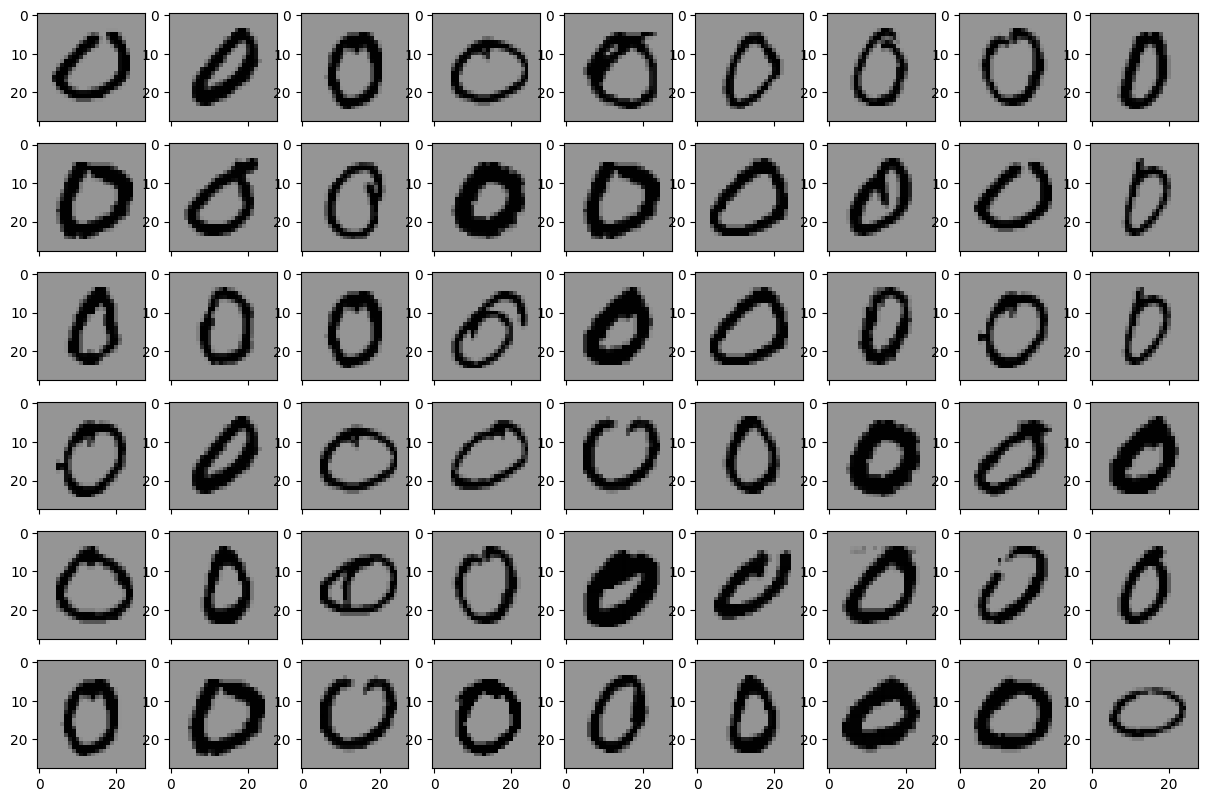

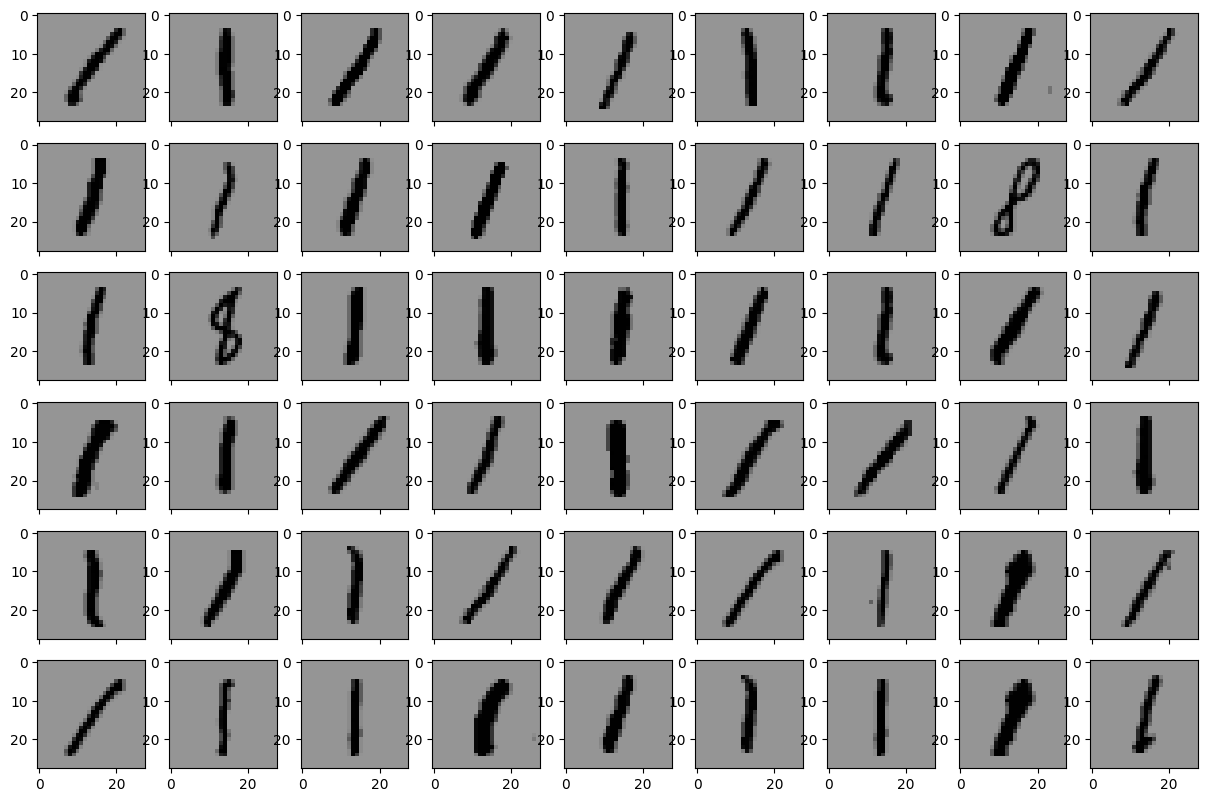

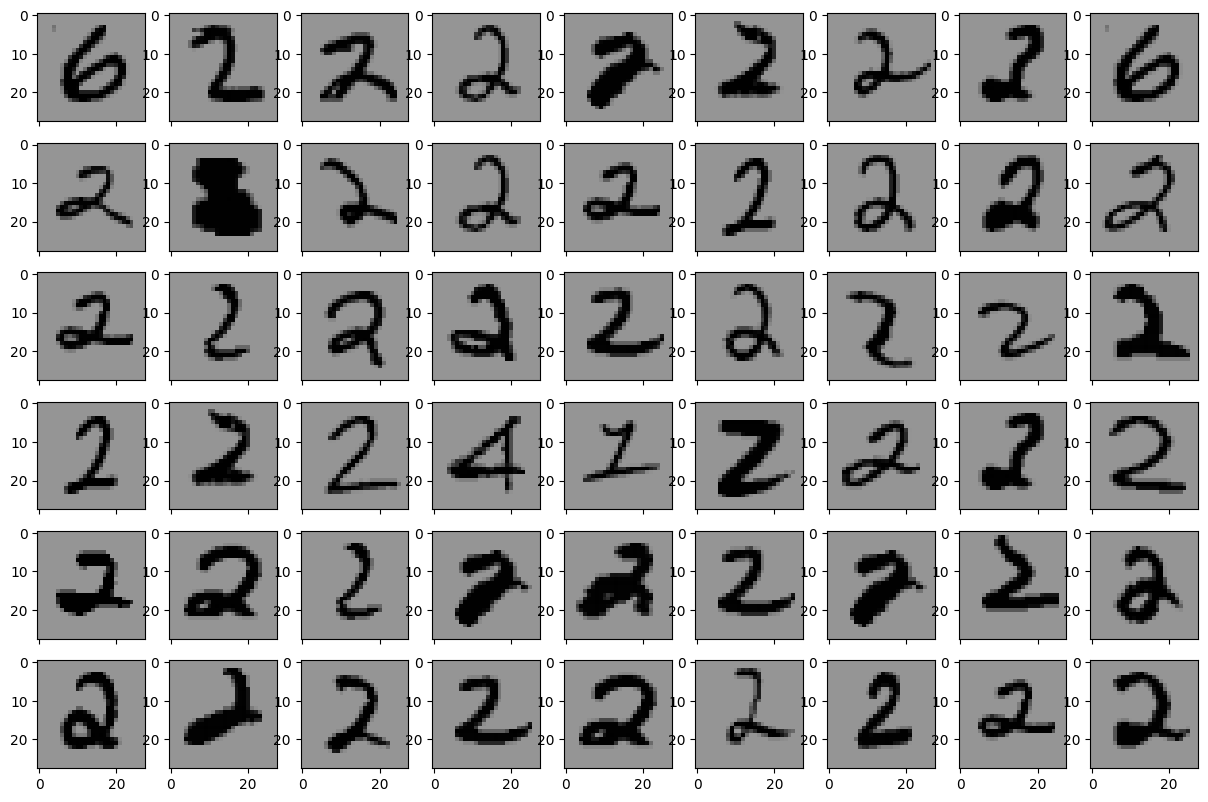

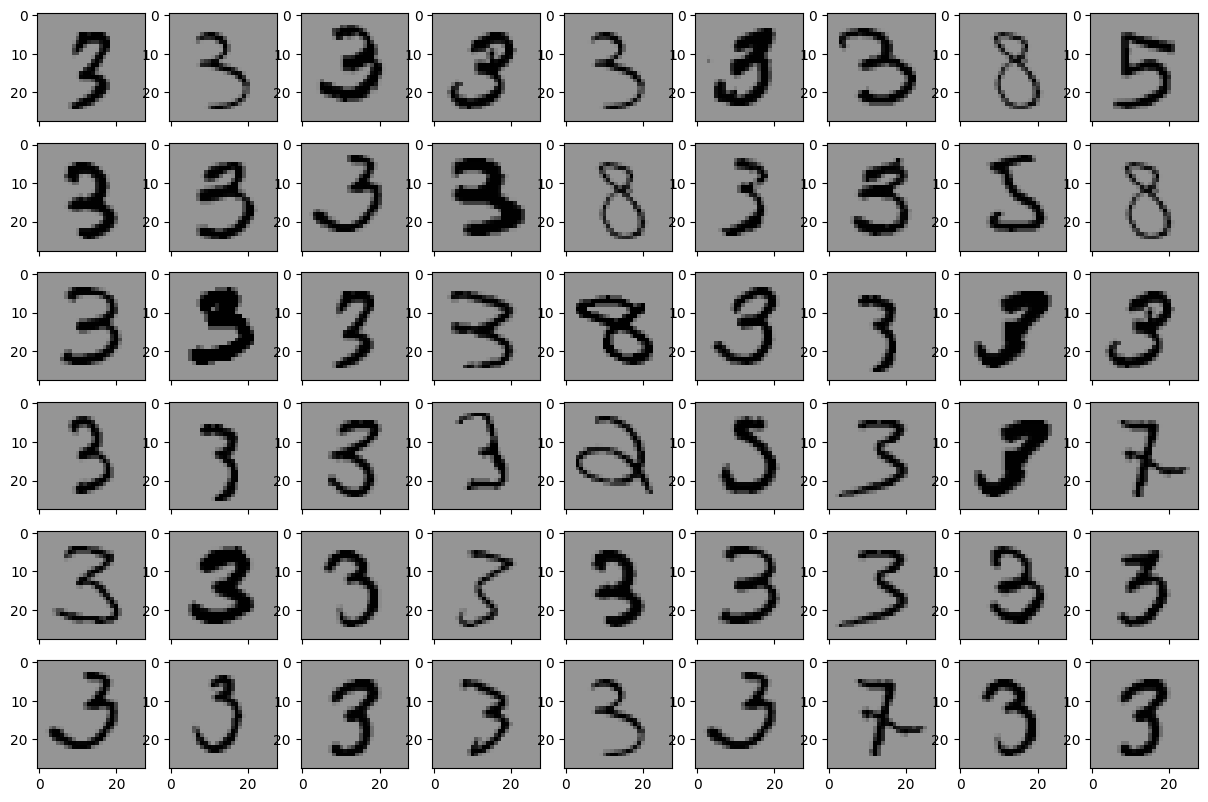

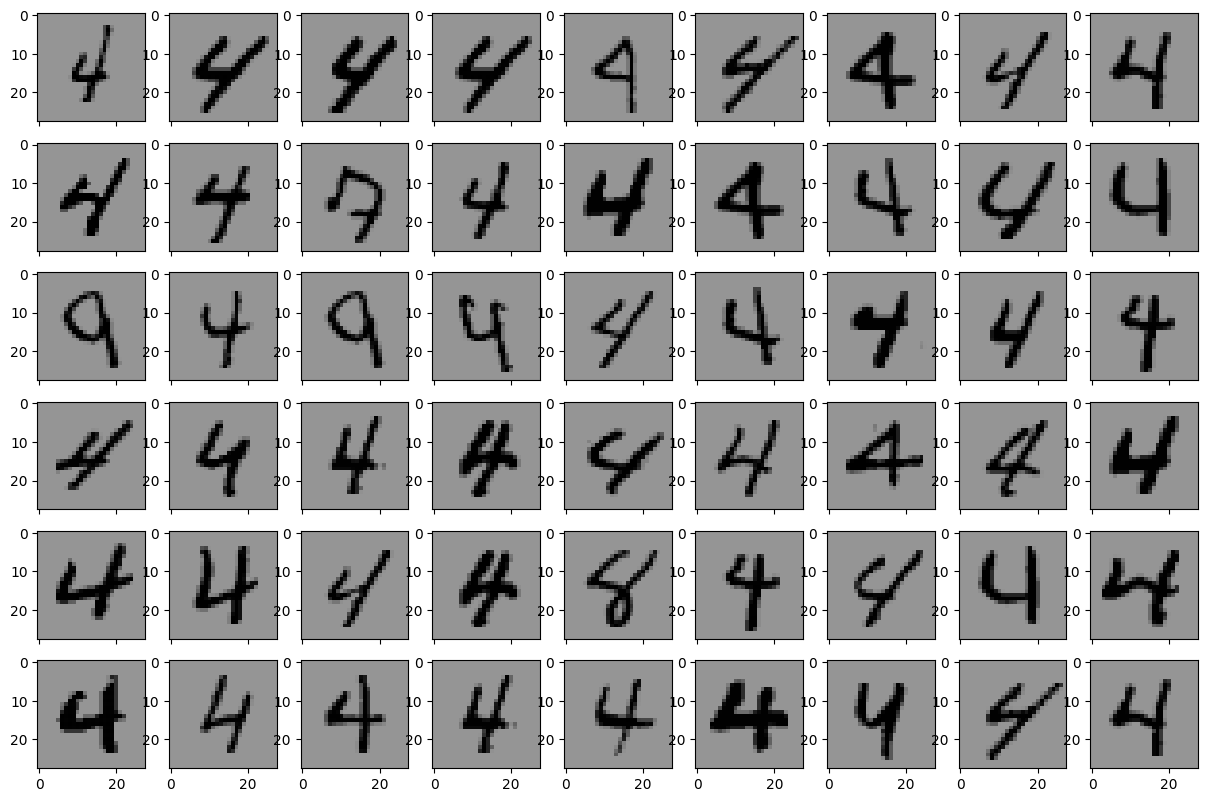

Error in callback <function flush_figures at 0x7f2a94ce84c0> (for post_execute):


KeyboardInterrupt: 

In [24]:
# Mostrar algunos digitos.
y_pred = np.argmax(m.predict(X_test_nor), axis=1)

for i in range(10):
  show_random_digits(X_test[y_pred==i])

In [25]:
np.argmax(np.array([1,1]))

0